In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
data = pd.read_csv('Housing.csv')

In [43]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [47]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [49]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [51]:
data.duplicated().sum()

0

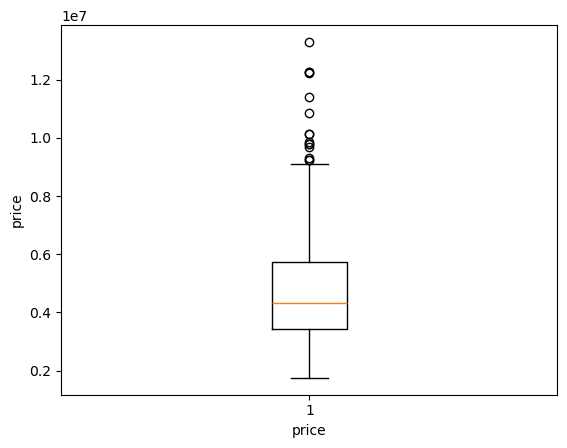

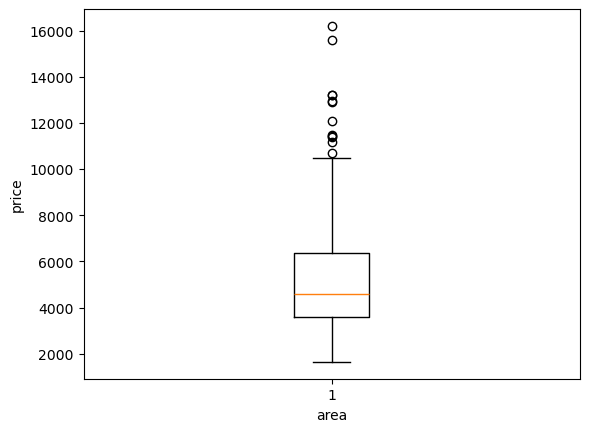

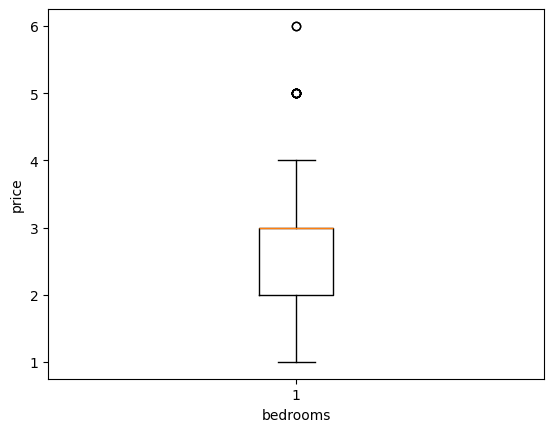

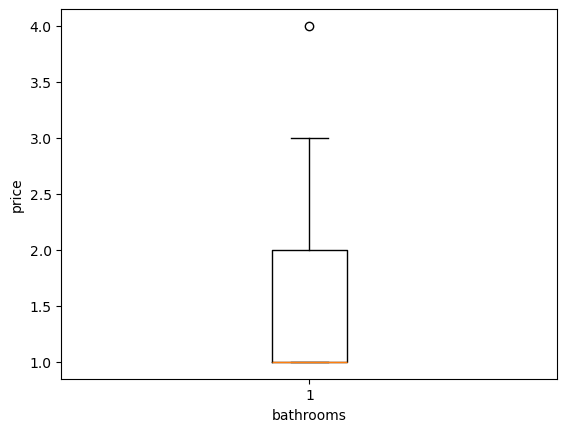

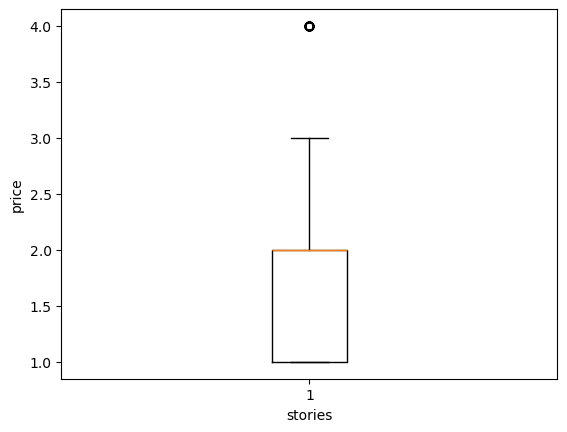

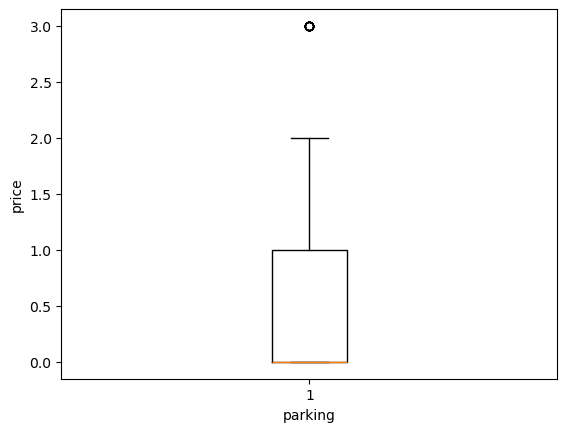

In [53]:
for i in data.columns:
  if (data[i].dtypes == 'int64' or data[i].dtypes == 'float64'):
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

In [55]:
for i in data.columns:
  if (data[i].dtypes != 'object'):
    p1 = data[i].quantile(0.01)
    p2 = data[i].quantile(0.99)
    data[i][data[i]<p1]=p1
    data[i][data[i]>p2]=p2

C:\Users\qwert\AppData\Local\Temp\ipykernel_12332\2221218698.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i][data[i]<p1]=p1
C:\Users\qwert\AppData\Local\Temp\ipykernel_12332\2221218698.py:5: SettingWithCopyWarning: 
A value is tr

In [57]:
data['mainroad'] = data['mainroad'].map({'yes':1,'no':0})

In [59]:
data['guestroom'] = data['guestroom'].map({'yes':1,'no':0})

In [61]:
data['basement'] = data['basement'].map({'yes':1,'no':0})

In [63]:
data.drop(columns = ['hotwaterheating'],inplace=True)

In [65]:
data['airconditioning'] = data['airconditioning'].map({'yes':1,'no':0})

In [67]:
data['prefarea'] = data['prefarea'].map({'yes':1,'no':0})

In [69]:
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

In [71]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,10542000.0,7420.0,4,2,3,1,0,0,1,2,1,1
1,10542000.0,8960.0,4,3,4,1,0,0,1,3,0,1
2,10542000.0,9960.0,3,2,2,1,0,1,0,2,1,2
3,10542000.0,7500.0,4,2,2,1,0,1,1,3,1,1
4,10542000.0,7420.0,4,1,2,1,1,1,1,2,0,1


In [73]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.544457,0.373285,0.512868,0.425905,0.302923,0.266023,0.190239,0.458419,0.379432,0.330462,-0.304816
area,0.544457,1.000000,0.152192,0.187806,0.089527,0.294114,0.148105,0.052660,0.227382,0.361163,0.244978,-0.178415
bedrooms,0.373285,0.152192,1.000000,0.380265,0.414158,-0.019717,0.082815,0.100051,0.165123,0.140217,0.081247,-0.126712
bathrooms,0.512868,0.187806,0.380265,1.000000,0.322147,0.041591,0.130288,0.106522,0.184532,0.170474,0.066579,-0.140707
stories,0.425905,0.089527,0.414158,0.322147,1.000000,0.121706,0.043538,-0.172394,0.293602,0.045547,0.044425,-0.104672
mainroad,0.302923,0.294114,-0.019717,0.041591,0.121706,1.000000,0.092337,0.044002,0.105423,0.204433,0.199876,-0.156726
guestroom,0.266023,0.148105,0.082815,0.130288,0.043538,0.092337,1.000000,0.372066,0.138179,0.037466,0.160897,-0.118328
basement,0.190239,0.052660,0.100051,0.106522,-0.172394,0.044002,0.372066,1.000000,0.047341,0.051497,0.228083,-0.112831
airconditioning,0.458419,0.227382,0.165123,0.184532,0.293602,0.105423,0.138179,0.047341,1.000000,0.159173,0.117382,-0.150477
parking,0.379432,0.361163,0.140217,0.170474,0.045547,0.204433,0.037466,0.051497,0.159173,1.000000,0.091627,-0.177539


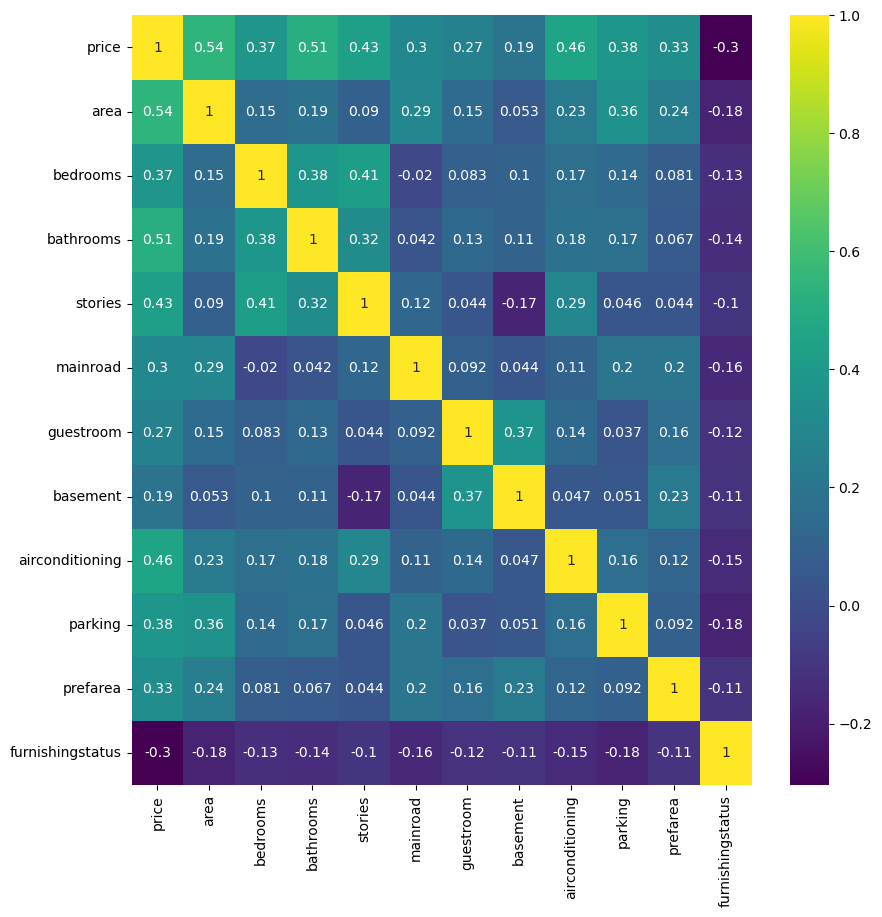

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr() , annot = True , cmap ='viridis' )
plt.show()

In [76]:
col_list = []
for col in data.columns:
  if ((data[col].dtypes !='object') and (col != 'price')):
    col_list.append(col)

In [77]:
col_list

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [81]:
X = data[col_list]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4,2,3,1,0,0,1,2,1,1
1,8960.0,4,3,4,1,0,0,1,3,0,1
2,9960.0,3,2,2,1,0,1,0,2,1,2
3,7500.0,4,2,2,1,0,1,1,3,1,1
4,7420.0,4,1,2,1,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2,1,1,1,0,1,0,2,0,3
541,2400.0,3,1,1,0,0,0,0,0,0,2
542,3620.0,2,1,1,1,0,0,0,0,0,3
543,2910.0,3,1,1,0,0,0,0,0,0,1


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
col_list = []
for col in data.columns:
  if ((data[col].dtypes !='object') and (col != 'price')):
    col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['vif'] = [variance_inflation_factor(X.values , i) for i in range (len(X.columns))]
print(vif_data)

            features        vif
0               area   8.839839
1           bedrooms  18.521916
2          bathrooms   9.651483
3            stories   7.895653
4           mainroad   7.072362
5          guestroom   1.476013
6           basement   2.016794
7    airconditioning   1.721118
8            parking   1.988909
9           prefarea   1.494261
10  furnishingstatus   5.966183


In [87]:
data.drop(columns = ['bedrooms','bathrooms'],inplace=True)

In [89]:
col_list = []
for col in data.columns:
  if ((data[col].dtypes !='object') and (col != 'price')):
    col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['vif'] = [variance_inflation_factor(X.values , i) for i in range (len(X.columns))]
print(vif_data)

           features       vif
0              area  7.821360
1           stories  5.153625
2          mainroad  6.995906
3         guestroom  1.471788
4          basement  1.830698
5   airconditioning  1.718215
6           parking  1.960997
7          prefarea  1.490793
8  furnishingstatus  4.806393


In [91]:
data.drop(columns ='area' , inplace = True)

In [93]:
col_list = []
for col in data.columns:
  if ((data[col].dtypes !='object') and (col != 'price')):
    col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['vif'] = [variance_inflation_factor(X.values , i) for i in range (len(X.columns))]
print(vif_data)

           features       vif
0           stories  4.987275
1          mainroad  5.919285
2         guestroom  1.460321
3          basement  1.826130
4   airconditioning  1.687777
5           parking  1.753621
6          prefarea  1.455352
7  furnishingstatus  4.370585


In [95]:
X = data.drop(columns = 'price')
y = data['price']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state = 42)

In [99]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()

In [104]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_test)

In [109]:
y_pred

array([4011566.24535425, 6406798.93234721, 3289108.8936857 ,
       4826511.00610713, 3543518.85652319, 3034698.93084821,
       5437377.90581301, 5776631.26047224, 3395892.66942379,
       2972191.21850931, 7725870.85807265, 3034698.93084821,
       3392260.92940849, 3783491.50183391, 4100409.1770103 ,
       3521920.43891323, 3897621.36953297, 5054585.74962747,
       4582893.88336813, 3289108.8936857 , 6506491.4825195 ,
       5842598.45836164, 3034698.93084821, 5750296.04115509,
       5193760.78307402, 6037154.04011878, 3941933.37139466,
       5059265.77291691, 7220453.63953043, 4152031.33237046,
       6001074.26397728, 4125696.11305331, 6139470.11502351,
       3897621.36953297, 3643211.40669548, 5308995.71246496,
       5769825.22279508, 5029298.81358446, 3392260.92940849,
       4152031.33237046, 4254078.30640136, 3963588.56742237,
       6406798.93234721, 4634516.03872829, 3289108.8936857 ,
       4446073.2737802 , 6043535.95780166, 4380106.0758908 ,
       3034698.93084821,

In [111]:
error_prediction = pd.DataFrame(columns=["Actual_data","Prediction_data"])

In [113]:
error_prediction

,Actual_data,Prediction_data


In [115]:
error_prediction["Actual_data"]=y_test
error_prediction["Prediction_data"]=y_pred

In [117]:
error_prediction

,Actual_data,Prediction_data
316,4060000.0,4.011566e+06
77,6650000.0,6.406799e+06
360,3710000.0,3.289109e+06
90,6440000.0,4.826511e+06
493,2800000.0,3.543519e+06
...,...,...
15,9100000.0,5.319789e+06
357,3773000.0,4.063188e+06
39,7910000.0,6.526021e+06
54,7350000.0,5.759032e+06


In [119]:
error_prediction["Error"]=error_prediction["Actual_data"]-error_prediction["Prediction_data"]
error_prediction

,Actual_data,Prediction_data,Error
316,4060000.0,4.011566e+06,4.843375e+04
77,6650000.0,6.406799e+06,2.432011e+05
360,3710000.0,3.289109e+06,4.208911e+05
90,6440000.0,4.826511e+06,1.613489e+06
493,2800000.0,3.543519e+06,-7.435189e+05
...,...,...,...
15,9100000.0,5.319789e+06,3.780211e+06
357,3773000.0,4.063188e+06,-2.901884e+05
39,7910000.0,6.526021e+06,1.383979e+06
54,7350000.0,5.759032e+06,1.590968e+06


In [121]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  1034591.5991582047
Mean Squared Error:  1917689133536.096
Root Mean Squared Error:  1917689133536.096
R2 Score:  0.5731790570760178


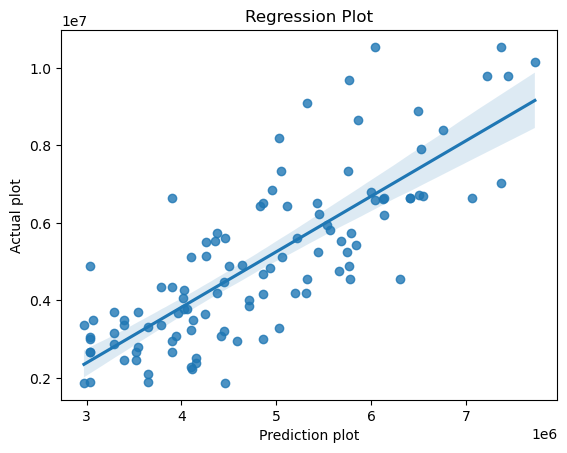

In [123]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Prediction plot")
plt.ylabel("Actual plot")
plt.title("Regression Plot")
plt.show()

### L2 and L1 regularization

In [126]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [128]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 608407.21232351  569082.97090295  449184.61319355  456678.54122343
  926388.31609421  482537.95993092  715483.34127136 -254733.1309304 ]


In [130]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5092215629140342
0.5728798918345788


In [132]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 608512.40537863  571327.05256106  450036.26811662  457197.55534329
  928889.38328008  482484.67645725  717365.19274961 -254409.93417397]


In [134]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5092228534766898
0.5731789827040061


### Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [152]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [154]:
y_prediction = rf_model.predict(X_test)

In [156]:
y_prediction

array([3999921.33333333, 5821707.5       , 3692344.65243498,
       4175532.625     , 3641153.2582403 , 2974156.57717049,
       4411692.        , 4404029.16666667, 3436700.93333333,
       3224808.46783626, 7449429.7       , 2974156.57717049,
       3163912.5       , 3479517.78787879, 3815265.41666667,
       3039407.83333333, 3896261.48111112, 5157942.33333333,
       4988701.66666667, 3692344.65243498, 6858123.75      ,
       6532429.16666667, 2974156.57717049, 5152845.83333333,
       5273661.66666667, 5067626.66666667, 5475974.        ,
       3962191.66666667, 7557661.99999999, 4453665.53846154,
       6306405.        , 3182344.21764706, 6143264.16666667,
       3896261.48111112, 3694232.70483325, 5583169.83333333,
       5223975.        , 4235875.        , 3163912.5       ,
       4453665.53846154, 4034066.94444444, 2880316.33333333,
       5821707.5       , 4618231.13888889, 3692344.65243498,
       5614177.82070707, 5207305.83333333, 4370510.73739659,
       2974156.57717049,

In [167]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_prediction))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error: ",metrics.mean_squared_error(y_test,y_prediction))
print("R2 Score: ",metrics.r2_score(y_test,y_prediction))

Mean Absolute Error:  1152789.2334902885
Mean Squared Error:  2394310907576.2095
Root Mean Squared Error:  2394310907576.2095
R2 Score:  0.46709713198381764


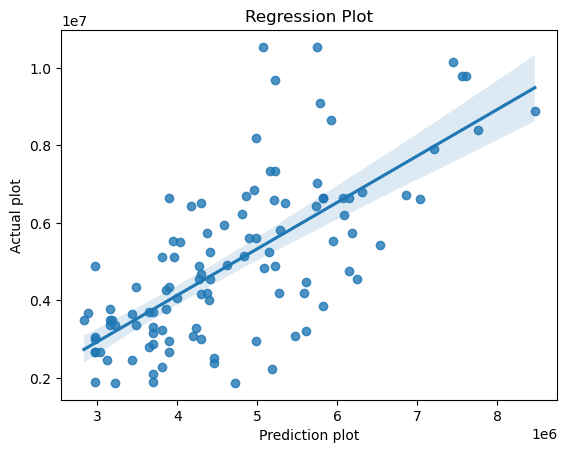

In [169]:
sns.regplot(x=y_prediction,y=y_test)
plt.xlabel("Prediction plot")
plt.ylabel("Actual plot")
plt.title("Regression Plot")
plt.show()